In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("Zcombined1.csv")

In [3]:
df

State Name District Name Market Name Variety       Group  \
0       Maharashtra    Ahmednagar  Ahmednagar   Other  Vegetables   
1       Maharashtra    Ahmednagar  Ahmednagar   Other  Vegetables   
2       Maharashtra    Ahmednagar  Ahmednagar   Other  Vegetables   
3       Maharashtra    Ahmednagar  Ahmednagar   Other  Vegetables   
4       Maharashtra    Ahmednagar  Ahmednagar   Other  Vegetables   
...             ...           ...         ...     ...         ...   
143570  Maharashtra        Wardha      Wardha   Local  Vegetables   
143571  Maharashtra        Wardha      Wardha   Local  Vegetables   
143572  Maharashtra        Wardha      Wardha   Local  Vegetables   
143573  Maharashtra        Wardha      Wardha   Local  Vegetables   
143574  Maharashtra        Wardha      Wardha   Local  Vegetables   

        Arrivals (Tonnes)  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                  1561.6                      100                     1525   
1                  1948.8                      200                     1255   
2                   662.5                      300                     1550   
3                   908.6                      400                     2000   
4                   621.2                      200                     1740   
...                   ...                      ...                      ...   
143570                8.0                      750                     1500   
143571               52.0                      750                     1500   
143572               32.0                      600                     1500   
143573               19.0                      600                     1500   
143574               11.0                      600                     1500   

        Modal Price (Rs./Quintal) Reported Date  
0                           815.0    10-01-2013  
1                           725.0    14-03-2013  
2                           925.0    30-05-2013  
3                          1200.0    20-06-2013  
4                           970.0    22-06-2013  
...                           ...           ...  
143570                     1125.0    26-07-2023  
143571                     1125.0    27-07-2023  
143572                     1050.0    01-08-2023  
143573                     1050.0    02-08-2023  
143574                     1050.0    09-08-2023  

[143575 rows x 10 columns]

In [4]:
df["Year"] = pd.to_datetime(df["Reported Date"], format="%d-%m-%Y").dt.year


In [5]:
df["date"] = pd.to_datetime(df["Reported Date"], format="%d-%m-%Y")

In [6]:
df.drop(["Reported Date"], axis=1, inplace=True)

In [7]:
df

State Name District Name Market Name Variety       Group  \
0       Maharashtra    Ahmednagar  Ahmednagar   Other  Vegetables   
1       Maharashtra    Ahmednagar  Ahmednagar   Other  Vegetables   
2       Maharashtra    Ahmednagar  Ahmednagar   Other  Vegetables   
3       Maharashtra    Ahmednagar  Ahmednagar   Other  Vegetables   
4       Maharashtra    Ahmednagar  Ahmednagar   Other  Vegetables   
...             ...           ...         ...     ...         ...   
143570  Maharashtra        Wardha      Wardha   Local  Vegetables   
143571  Maharashtra        Wardha      Wardha   Local  Vegetables   
143572  Maharashtra        Wardha      Wardha   Local  Vegetables   
143573  Maharashtra        Wardha      Wardha   Local  Vegetables   
143574  Maharashtra        Wardha      Wardha   Local  Vegetables   

        Arrivals (Tonnes)  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                  1561.6                      100                     1525   
1                  1948.8                      200                     1255   
2                   662.5                      300                     1550   
3                   908.6                      400                     2000   
4                   621.2                      200                     1740   
...                   ...                      ...                      ...   
143570                8.0                      750                     1500   
143571               52.0                      750                     1500   
143572               32.0                      600                     1500   
143573               19.0                      600                     1500   
143574               11.0                      600                     1500   

        Modal Price (Rs./Quintal)  Year       date  
0                           815.0  2013 2013-01-10  
1                           725.0  2013 2013-03-14  
2                           925.0  2013 2013-05-30  
3                          1200.0  2013 2013-06-20  
4                           970.0  2013 2013-06-22  
...                           ...   ...        ...  
143570                     1125.0  2023 2023-07-26  
143571                     1125.0  2023 2023-07-27  
143572                     1050.0  2023 2023-08-01  
143573                     1050.0  2023 2023-08-02  
143574                     1050.0  2023 2023-08-09  

[143575 rows x 11 columns]

In [8]:
df_test2 = df.groupby("date")["Arrivals (Tonnes)"].mean()

In [9]:
df_test2 = df_test2.reset_index()

In [10]:
df_test2

date  Arrivals (Tonnes)
0    2013-01-01         461.816667
1    2013-01-02         420.890323
2    2013-01-03         406.461538
3    2013-01-04         748.884000
4    2013-01-05         443.078261
...         ...                ...
4322 2024-12-14         628.839623
4323 2024-12-15         359.810333
4324 2024-12-16         776.501667
4325 2024-12-17         720.182353
4326 2024-12-18         638.791667

[4327 rows x 2 columns]

In [11]:
# Ensure the 'sma' column is calculated
df_test2["sma"] = df_test2["Arrivals (Tonnes)"].rolling(window=7).mean()

# Plot the data
px.line(df_test2, x="date", y="sma", title="Arrivals Over Time")

In [12]:
df_test2.sort_values(by="date", inplace=True)

In [13]:
sma = df_test2["Arrivals (Tonnes)"].rolling(window=7).mean()

In [14]:
df_test2 = df_test2.iloc[7:]

In [15]:
df_test2["sma"] = sma

C:\Users\omkar\AppData\Local\Temp\ipykernel_21916\9049728.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
df_test2.set_index("date", inplace=True)

In [17]:
df_test2.to_csv("sma.csv")

In [18]:
df["date"]

0        2013-01-10
1        2013-03-14
2        2013-05-30
3        2013-06-20
4        2013-06-22
            ...    
143570   2023-07-26
143571   2023-07-27
143572   2023-08-01
143573   2023-08-02
143574   2023-08-09
Name: date, Length: 143575, dtype: datetime64[ns]

## Importing necessary libraries 


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Data Cleaning

In [20]:
df = pd.read_csv("Zcombined1.csv")

In [21]:
df

State Name District Name Market Name Variety       Group  \
0       Maharashtra    Ahmednagar  Ahmednagar   Other  Vegetables   
1       Maharashtra    Ahmednagar  Ahmednagar   Other  Vegetables   
2       Maharashtra    Ahmednagar  Ahmednagar   Other  Vegetables   
3       Maharashtra    Ahmednagar  Ahmednagar   Other  Vegetables   
4       Maharashtra    Ahmednagar  Ahmednagar   Other  Vegetables   
...             ...           ...         ...     ...         ...   
143570  Maharashtra        Wardha      Wardha   Local  Vegetables   
143571  Maharashtra        Wardha      Wardha   Local  Vegetables   
143572  Maharashtra        Wardha      Wardha   Local  Vegetables   
143573  Maharashtra        Wardha      Wardha   Local  Vegetables   
143574  Maharashtra        Wardha      Wardha   Local  Vegetables   

        Arrivals (Tonnes)  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                  1561.6                      100                     1525   
1                  1948.8                      200                     1255   
2                   662.5                      300                     1550   
3                   908.6                      400                     2000   
4                   621.2                      200                     1740   
...                   ...                      ...                      ...   
143570                8.0                      750                     1500   
143571               52.0                      750                     1500   
143572               32.0                      600                     1500   
143573               19.0                      600                     1500   
143574               11.0                      600                     1500   

        Modal Price (Rs./Quintal) Reported Date  
0                           815.0    10-01-2013  
1                           725.0    14-03-2013  
2                           925.0    30-05-2013  
3                          1200.0    20-06-2013  
4                           970.0    22-06-2013  
...                           ...           ...  
143570                     1125.0    26-07-2023  
143571                     1125.0    27-07-2023  
143572                     1050.0    01-08-2023  
143573                     1050.0    02-08-2023  
143574                     1050.0    09-08-2023  

[143575 rows x 10 columns]

In [22]:
df["date"] = pd.to_datetime(df["Reported Date"], format="%d-%m-%Y")

In [23]:
df_test = df.groupby(by="date")["Arrivals (Tonnes)"].mean()

In [24]:
df_test = df_test.reset_index(drop=False)

In [25]:
df_test.sort_values(by="date")

date  Arrivals (Tonnes)
0    2013-01-01         461.816667
1    2013-01-02         420.890323
2    2013-01-03         406.461538
3    2013-01-04         748.884000
4    2013-01-05         443.078261
...         ...                ...
4322 2024-12-14         628.839623
4323 2024-12-15         359.810333
4324 2024-12-16         776.501667
4325 2024-12-17         720.182353
4326 2024-12-18         638.791667

[4327 rows x 2 columns]

In [26]:
df.drop(["Reported Date"], axis=1, inplace=True)

In [27]:
df["Year"] = df["date"].dt.year

In [28]:
df_test2 = df.groupby("date")["Arrivals (Tonnes)"].mean()

In [29]:
df_test2 = df_test2.reset_index()

In [30]:
df_test2.sort_values(by="date", inplace=True)

In [31]:
df_test

date  Arrivals (Tonnes)
0    2013-01-01         461.816667
1    2013-01-02         420.890323
2    2013-01-03         406.461538
3    2013-01-04         748.884000
4    2013-01-05         443.078261
...         ...                ...
4322 2024-12-14         628.839623
4323 2024-12-15         359.810333
4324 2024-12-16         776.501667
4325 2024-12-17         720.182353
4326 2024-12-18         638.791667

[4327 rows x 2 columns]

In [32]:
df_test["Arrivals (Tonnes)"][4084] = 1500

C:\Users\omkar\AppData\Local\Temp\ipykernel_21916\2929250844.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\omkar\AppData\Local\Temp\ipykernel_21916\2929250844.py:1: SettingWithCopyWarning:


A value is trying to be set on a co

In [33]:
px.line(df_test, x="date", y="Arrivals (Tonnes)", title="Arrivals Over Time")

In [34]:
rolling_windows = [7, 14, 30, 60, 90, 180, 365]

for window in rolling_windows:
    df_test[f"sma_{window}"] = df_test["Arrivals (Tonnes)"].rolling(window=window).mean()
    df_test[f"std_{window}"] = df_test["Arrivals (Tonnes)"].rolling(window=window).std()

df_test['value_pct_change'] = df_test['Arrivals (Tonnes)'].pct_change()

In [35]:
df_test.dropna(inplace=True)

In [36]:
df_test

date  Arrivals (Tonnes)       sma_7       std_7      sma_14  \
364  2013-12-31        1026.445455  559.395790  241.143928  616.516934   
365  2014-01-01         295.388235  549.073101  252.021452  580.683951   
366  2014-01-02         777.863158  593.600954  262.259868  577.390163   
367  2014-01-03        1074.231250  654.149116  320.103860  585.653348   
368  2014-01-04         445.381250  651.798818  321.807106  582.519151   
...         ...                ...         ...         ...         ...   
4322 2024-12-14         628.839623  508.372906  133.713272  477.276391   
4323 2024-12-15         359.810333  528.137193   85.919588  494.054113   
4324 2024-12-16         776.501667  557.789669  127.905351  505.934686   
4325 2024-12-17         720.182353  584.034389  140.981087  526.030024   
4326 2024-12-18         638.791667  606.294525  134.517594  534.672005   

          std_14      sma_30      std_30      sma_60      std_60      sma_90  \
364   243.571766  607.266816  217.750037  481.255548  229.126301  378.353492   
365   251.733846  604.240527  221.526836  485.173686  223.752846  381.232464   
366   248.587660  616.636150  220.452809  497.472238  219.097632  388.812311   
367   263.695714  632.960925  235.602574  514.120676  224.364829  400.017445   
368   265.186095  623.106839  237.105272  520.007363  217.639377  404.455869   
...          ...         ...         ...         ...         ...         ...   
4322  145.596394  397.629307  151.854598  355.486713  141.126637  338.230546   
4323  111.383591  396.545734  152.009708  356.054575  141.073447  338.735857   
4324  131.733636  409.116529  167.096847  364.064773  150.901668  344.979052   
4325  141.787119  421.068362  176.160259  371.921145  156.948545  350.118842   
4326  144.900119  436.403417  174.352611  377.324342  160.482343  355.404957   

          std_90     sma_180     std_180     sma_365     std_365  \
364   242.752219  313.450180  206.732245  375.360186  187.696557   
365   240.172514  312.427975  206.361744  374.904217  187.688103   
366   241.818381  315.098022  209.253285  375.882225  188.854820   
367   249.910498  319.159196  216.761144  377.711731  192.353916   
368   247.082299  319.187955  216.777636  376.880217  191.398616   
...          ...         ...         ...         ...         ...   
4322  127.514700  362.212793  128.509127  439.382611  180.274045   
4323  127.509042  362.942502  128.117732  438.922437  180.262169   
4324  134.904718  361.749873  123.139394  439.894749  181.123588   
4325  140.244620  363.716623  126.004137  439.931359  181.179031   
4326  142.068206  364.272474  126.997309  440.374310  181.467594   

      value_pct_change  
364           0.621423  
365          -0.712222  
366           1.633359  
367           0.381003  
368          -0.585395  
...                ...  
4322          0.117025  
4323         -0.427819  
4324          1.158086  
4325         -0.072530  
4326         -0.113014  

[3963 rows x 17 columns]

In [37]:
df_test2["date"] = pd.to_datetime(df_test2["date"])

In [38]:
df_test2["year"] = df_test2["date"].dt.year

<Axes: xlabel='year'>

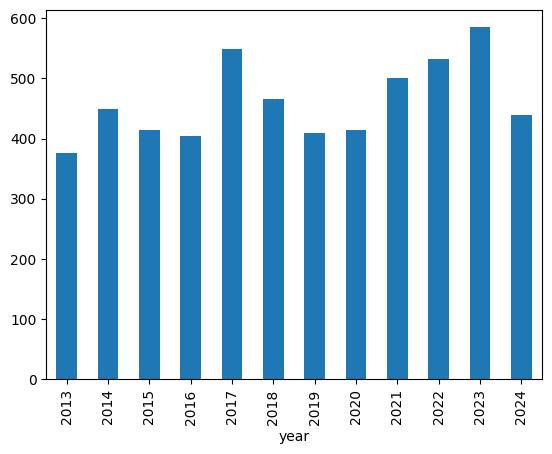

In [39]:
df_test2.groupby(by="year")["Arrivals (Tonnes)"].mean().plot(kind="bar")

In [40]:

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Create subplots using plotly express
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Ensure rolling averages are calculated
rolling_windows = [7, 14, 30, 60, 90, 180, 365]
for window in rolling_windows:
    df_test2[f"sma_{window}"] = df_test2["Arrivals (Tonnes)"].rolling(window=window).mean()

# Create 4x2 subplot figure
fig = make_subplots(rows=4, cols=2, subplot_titles=('Original Data', '7-Day SMA', 
                                                   '14-Day SMA', '30-Day SMA',
                                                   '60-Day SMA', '90-Day SMA',
                                                   '180-Day SMA', '365-Day SMA'))

# Add traces for each subplot
fig.add_trace(go.Scatter(x=df_test2['date'], y=df_test2['Arrivals (Tonnes)']), row=1, col=1)
fig.add_trace(go.Scatter(x=df_test2['date'], y=df_test2.get('sma_7', [])), row=1, col=2)
fig.add_trace(go.Scatter(x=df_test2['date'], y=df_test2.get('sma_14', [])), row=2, col=1)
fig.add_trace(go.Scatter(x=df_test2['date'], y=df_test2.get('sma_30', [])), row=2, col=2)
fig.add_trace(go.Scatter(x=df_test2['date'], y=df_test2.get('sma_60', [])), row=3, col=1)
fig.add_trace(go.Scatter(x=df_test2['date'], y=df_test2.get('sma_90', [])), row=3, col=2)
fig.add_trace(go.Scatter(x=df_test2['date'], y=df_test2.get('sma_180', [])), row=4, col=1)
fig.add_trace(go.Scatter(x=df_test2['date'], y=df_test2.get('sma_365', [])), row=4, col=2)

# Update layout
fig.update_layout(height=1500, width=1000, title_text="Date vs Tonnes and SMAs", showlegend=False)
fig.update_xaxes(tickangle=45)

# Show plot
fig.show()    

In [41]:
df_test.to_csv("sma.csv", index=False)

## Data Preprocessing and Dataset Genration

In [42]:
df = pd.read_csv("sma.csv")

In [43]:
df.rename(columns={"Arrivals (Tonnes)":"value"}, inplace=True)

In [44]:
df

date        value       sma_7       std_7      sma_14      std_14  \
0     2013-12-31  1026.445455  559.395790  241.143928  616.516934  243.571766   
1     2014-01-01   295.388235  549.073101  252.021452  580.683951  251.733846   
2     2014-01-02   777.863158  593.600954  262.259868  577.390163  248.587660   
3     2014-01-03  1074.231250  654.149116  320.103860  585.653348  263.695714   
4     2014-01-04   445.381250  651.798818  321.807106  582.519151  265.186095   
...          ...          ...         ...         ...         ...         ...   
3958  2024-12-14   628.839623  508.372906  133.713272  477.276391  145.596394   
3959  2024-12-15   359.810333  528.137193   85.919588  494.054113  111.383591   
3960  2024-12-16   776.501667  557.789669  127.905351  505.934686  131.733636   
3961  2024-12-17   720.182353  584.034389  140.981087  526.030024  141.787119   
3962  2024-12-18   638.791667  606.294525  134.517594  534.672005  144.900119   

          sma_30      std_30      sma_60      std_60      sma_90      std_90  \
0     607.266816  217.750037  481.255548  229.126301  378.353492  242.752219   
1     604.240527  221.526836  485.173686  223.752846  381.232464  240.172514   
2     616.636150  220.452809  497.472238  219.097632  388.812311  241.818381   
3     632.960925  235.602574  514.120676  224.364829  400.017445  249.910498   
4     623.106839  237.105272  520.007363  217.639377  404.455869  247.082299   
...          ...         ...         ...         ...         ...         ...   
3958  397.629307  151.854598  355.486713  141.126637  338.230546  127.514700   
3959  396.545734  152.009708  356.054575  141.073447  338.735857  127.509042   
3960  409.116529  167.096847  364.064773  150.901668  344.979052  134.904718   
3961  421.068362  176.160259  371.921145  156.948545  350.118842  140.244620   
3962  436.403417  174.352611  377.324342  160.482343  355.404957  142.068206   

         sma_180     std_180     sma_365     std_365  value_pct_change  
0     313.450180  206.732245  375.360186  187.696557          0.621423  
1     312.427975  206.361744  374.904217  187.688103         -0.712222  
2     315.098022  209.253285  375.882225  188.854820          1.633359  
3     319.159196  216.761144  377.711731  192.353916          0.381003  
4     319.187955  216.777636  376.880217  191.398616         -0.585395  
...          ...         ...         ...         ...               ...  
3958  362.212793  128.509127  439.382611  180.274045          0.117025  
3959  362.942502  128.117732  438.922437  180.262169         -0.427819  
3960  361.749873  123.139394  439.894749  181.123588          1.158086  
3961  363.716623  126.004137  439.931359  181.179031         -0.072530  
3962  364.272474  126.997309  440.374310  181.467594         -0.113014  

[3963 rows x 17 columns]

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

def preprocess_time_series(df, lookback=30, forecast_horizon=1):
    # Ensure the data is sorted by date
    df = df.sort_values(by='date').reset_index(drop=True)
    
    # Extract date column for reference
    dates = df['date']
    
    # Select numeric columns (excluding date)
    numeric_cols = df.columns.difference(['date'])

    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    # Prepare the feature matrix (X) and target array (y)
    X, y = [], []
    # We need at least lookback days plus forecast_horizon steps ahead to form one sample
    for i in range(len(df) - lookback - forecast_horizon + 1):
        # Extract features for the lookback period
        X_window = df[numeric_cols].iloc[i: i + lookback].values
        X.append(X_window)
        # The target is the 'value' at forecast_horizon days after the lookback period
        y_window = df['sma_60'].iloc[i + lookback : i + lookback + forecast_horizon].values
        y.append(y_window)
    
    return df, np.array(X), np.array(y)

In [46]:
df, X, y = preprocess_time_series(df, lookback=10, forecast_horizon=1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## XGBoost Model

In [48]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create 4x2 subplot figure
fig = make_subplots(rows=4, cols=2, subplot_titles=('Original Data', '7-Day SMA', 
                                                   '14-Day SMA', '30-Day SMA',
                                                   '60-Day SMA', '90-Day SMA',
                                                   '180-Day SMA', '365-Day SMA'))

# Add traces for each subplot
fig.add_trace(go.Scatter(x=df['date'], y=df['value']), row=1, col=1)
fig.add_trace(go.Scatter(x=df['date'], y=df['std_7']), row=1, col=2)
fig.add_trace(go.Scatter(x=df['date'], y=df['std_14']), row=2, col=1)
fig.add_trace(go.Scatter(x=df['date'], y=df['std_30']), row=2, col=2)
fig.add_trace(go.Scatter(x=df['date'], y=df['std_60']), row=3, col=1)
fig.add_trace(go.Scatter(x=df['date'], y=df['std_90']), row=3, col=2)
fig.add_trace(go.Scatter(x=df['date'], y=df['std_180']), row=4, col=1)
fig.add_trace(go.Scatter(x=df['date'], y=df['std_365']), row=4, col=2)

# Update layout
fig.update_layout(height=1500, width=1000, title_text="Date vs Tonnes and SMAs", showlegend=False)
fig.update_xaxes(tickangle=45)

# Show plot
fig.show()  

In [50]:
df

date     value     sma_7     std_7    sma_14    std_14    sma_30  \
0     2013-12-31  0.599716  0.378678  0.312259  0.509344  0.362878  0.617119   
1     2014-01-01  0.171751  0.370932  0.326999  0.473943  0.375769  0.613279   
2     2014-01-02  0.454194  0.404347  0.340873  0.470689  0.370800  0.629007   
3     2014-01-03  0.627690  0.449784  0.419255  0.478853  0.394660  0.649721   
4     2014-01-04  0.259558  0.448020  0.421563  0.475756  0.397014  0.637218   
...          ...       ...       ...       ...       ...       ...       ...   
3958  2024-12-14  0.366955  0.340389  0.166683  0.371784  0.208143  0.351116   
3959  2024-12-15  0.209464  0.355221  0.101919  0.388359  0.154110  0.349741   
3960  2024-12-16  0.453397  0.377473  0.158813  0.400096  0.186250  0.365692   
3961  2024-12-17  0.420428  0.397168  0.176531  0.419949  0.202127  0.380857   
3962  2024-12-18  0.372781  0.413872  0.167773  0.428487  0.207044  0.400316   

        std_30    sma_60    std_60    sma_90    std_90   sma_180   std_180  \
0     0.412372  0.527103  0.547646  0.367446  0.669326  0.123547  0.558450   
1     0.420899  0.533265  0.531371  0.372444  0.659842  0.120908  0.556412   
2     0.418474  0.552607  0.517271  0.385600  0.665893  0.127801  0.572317   
3     0.452679  0.578789  0.533224  0.405049  0.695642  0.138285  0.613616   
4     0.456072  0.588047  0.512854  0.412753  0.685245  0.138359  0.613706   
...        ...       ...       ...       ...       ...       ...       ...   
3958  0.263592  0.329310  0.281107  0.297804  0.245674  0.249429  0.128168   
3959  0.263943  0.330203  0.280946  0.298681  0.245653  0.251312  0.126015   
3960  0.298006  0.342801  0.310714  0.309518  0.272842  0.248234  0.098631   
3961  0.318470  0.355156  0.329030  0.318439  0.292474  0.253311  0.114389   
3962  0.314389  0.363654  0.339733  0.327614  0.299178  0.254746  0.119852   

       sma_365   std_365  value_pct_change  
0     0.103594  0.458285          0.019665  
1     0.101754  0.458215          0.003366  
2     0.105699  0.467893          0.032033  
3     0.113079  0.496918          0.016727  
4     0.109725  0.488994          0.004916  
...        ...       ...               ...  
3958  0.361838  0.396716          0.013500  
3959  0.359981  0.396618          0.006841  
3960  0.363903  0.403763          0.026224  
3961  0.364051  0.404223          0.011184  
3962  0.365838  0.406616          0.010689  

[3963 rows x 17 columns]

In [51]:
xgb_params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 500,
    'seed': 42,
    'verbosity': 1
}

n_samples, lookback, n_features = X.shape
X_flat = X.reshape(n_samples, lookback * n_features)

X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

In [ ]:
xgb_regressor = xgb.XGBRegressor(**xgb_params)
multi_output_model = MultiOutputRegressor(xgb_regressor)
multi_output_model.fit(X_train, y_train)
predictions = multi_output_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("MSE:", mse)
print("R2:", r2)

MSE: 4.115370080938888e-05
R2: 0.9987643417282132


In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from bayes_opt import BayesianOptimization

n_samples, lookback, n_features = X.shape
X_flat = X.reshape(n_samples, lookback * n_features)
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

def xgb_evaluate(learning_rate, max_depth, n_estimators, subsample, colsample_bytree):
    params = {
        'learning_rate': learning_rate,
        'max_depth': int(max_depth),
        'n_estimators': int(n_estimators),
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'objective': 'reg:squarederror',
        'seed': 42,
        'verbosity': 0
    }
    model = MultiOutputRegressor(xgb.XGBRegressor(**params))
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return r2_score(y_test, predictions)

param_bounds = {
    'learning_rate': (0.01, 0.3),
    'max_depth': (3, 10),
    'n_estimators': (50, 300),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

optimizer = BayesianOptimization(f=xgb_evaluate, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=20)

best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])

final_model = MultiOutputRegressor(xgb.XGBRegressor(**best_params))
final_model.fit(X_train, y_train)
final_predictions = final_model.predict(X_test)

mse = mean_squared_error(y_test, final_predictions)
r2 = r2_score(y_test, final_predictions)

print("Best Parameters:", best_params)
print("Final MSE:", mse)
print("Final R2:", r2)

|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
| 1         | 0.9979    | 0.7498    | 0.2857    | 8.124     | 199.7     | 0.6624    |
| 2         | 0.9988    | 0.6624    | 0.02684   | 9.063     | 200.3     | 0.8832    |
| 3         | 0.998     | 0.6082    | 0.2913    | 8.827     | 103.1     | 0.6727    |
| 4         | 0.9987    | 0.6734    | 0.09823   | 6.673     | 158.0     | 0.7165    |
| 5         | 0.9988    | 0.8447    | 0.05045   | 5.045     | 141.6     | 0.7824    |
| 6         | 0.9987    | 0.8635    | 0.03192   | 5.057     | 141.6     | 0.8074    |
| 7         | 0.9934    | 0.8106    | 0.01871   | 4.715     | 141.5     | 0.7279    |
| 8         | 0.9989    | 0.8453    | 0.06405   | 8.908     | 200.4     | 0.6723    |
| 9         | 0.9987    | 0.7896    | 0.1039    | 5.082     | 141.8     | 0.9673    |
| 10        | 0.9989    | 0.923     | 0.06098   | 5.21

## CNN_LSTM Based Model

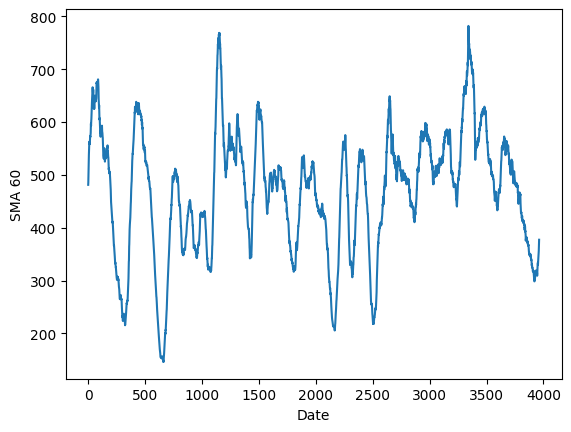

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Dropout

data = pd.read_csv("sma.csv")

X = data["sma_60"]

plt.xlabel('Date', fontsize=10)
plt.ylabel('SMA 60', fontsize=10)
plt.plot(X)

In [53]:
training_data_len = int(np.ceil( len(X) * .80 ))

In [54]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X.to_frame())

scaled_data

array([[ 0.09488103],
       [ 0.12857976],
       [ 0.23435596],
       ...,
       [-0.91304203],
       [-0.84547171],
       [-0.79900041]])

In [55]:
train_data = scaled_data[0:training_data_len, :]
test_data = scaled_data[training_data_len - 60:, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

[array([0.09488103, 0.12857976, 0.23435596, 0.37754423, 0.42817388,
       0.47382742, 0.58117407, 0.65755974, 0.68079126, 0.74574421,
       0.78195795, 0.79664365, 0.75610796, 0.79107626, 0.75756404,
       0.80304113, 0.82736758, 0.87920211, 0.88705852, 0.87454367,
       0.90296788, 0.92359729, 0.93891233, 1.01619005, 1.09132882,
       1.05305268, 1.11596356, 1.14201992, 1.16790097, 1.22785766,
       1.2641402 , 1.40008121, 1.44341712, 1.4441473 , 1.48609757,
       1.52742765, 1.53466631, 1.64853716, 1.66872478, 1.6823088 ,
       1.64445376, 1.63652391, 1.59493166, 1.595055  , 1.64559958,
       1.59606732, 1.56528262, 1.47665954, 1.45052399, 1.39146826,
       1.33576437, 1.39808901, 1.3575822 , 1.33257116, 1.33501848,
       1.39342181, 1.41464602, 1.46102611, 1.49912292, 1.54588788])]
[1.4752200732314105]

[array([0.09488103, 0.12857976, 0.23435596, 0.37754423, 0.42817388,
       0.47382742, 0.58117407, 0.65755974, 0.68079126, 0.74574421,
       0.78195795, 0.79664365, 0.756

In [56]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from sklearn.metrics import r2_score

# Build the LSTM model
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=3, validation_split=0.2)

Epoch 1/3
78/78 [==============================] - 21s 215ms/step - loss: 0.1483 - val_loss: 0.0239
Epoch 2/3
78/78 [==============================] - 16s 203ms/step - loss: 0.0430 - val_loss: 0.0230
Epoch 3/3
78/78 [==============================] - 18s 227ms/step - loss: 0.0310 - val_loss: 0.0186


In [ ]:
from tensorflow.keras.utils import plot_model

# Save model architecture as an image
plot_model(model, to_file="model_architecture.pdf", show_shapes=True, show_layer_names=True, dpi=300)


print("Model architecture saved as model_architecture.png")


Model architecture saved as model_architecture.png


In [ ]:
# # Ensure x_test is created with the correct window size (60)
# x_test = []
# for i in range(60, len(test_data)):
# 	x_test.append(test_data[i-60:i, 0])

# # Convert x_test to a numpy array
# x_test = np.array(x_test)

# # Reshape x_test to match the input shape expected by the model
# X_test_reshaped = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# # Predict on test data
y_pred = model.predict(test_data)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
# print(f"R² Score: {r2:.4f}")

In [58]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = X.iloc[training_data_len:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions.ravel() - y_test) ** 2)))
# Calculate R² score
r2 = r2_score(y_test, predictions.ravel())
print(f"R² Score: {r2:.4f}")
rmse

25/25 [==============================] - 2s 48ms/step
R² Score: 0.9730


17.464408447139952

In [ ]:
train['date']

0       2013-12-31
1       2014-01-01
2       2014-01-02
3       2014-01-03
4       2014-01-04
           ...    
3165    2022-10-06
3166    2022-10-07
3167    2022-10-08
3168    2022-10-09
3169    2022-10-10
Name: date, Length: 3170, dtype: object

C:\Users\omkar\AppData\Local\Temp\ipykernel_21916\1597904509.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



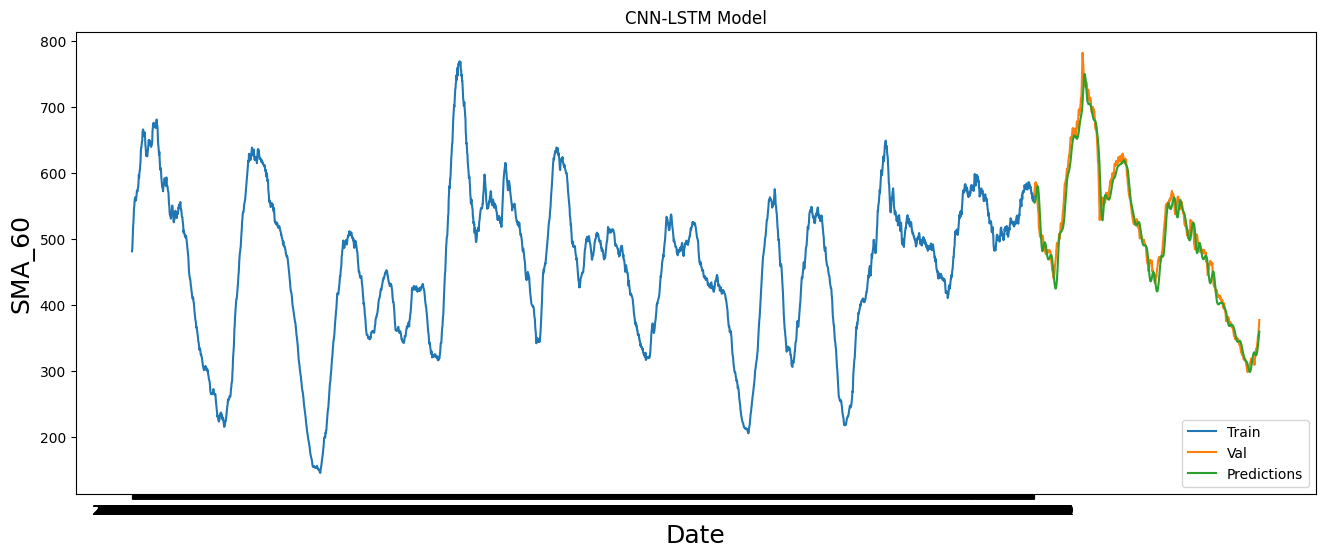

In [59]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('CNN-LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('SMA_60', fontsize=18)
plt.plot(train['date'], train['sma_60'])
plt.plot(valid[['sma_60', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## RNN Based Model

In [61]:
from keras.layers import SimpleRNN

In [62]:
# Build the LSTM model
model2 = Sequential()
model2.add(SimpleRNN(256, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model2.add(Dropout(0.2))
model2.add(SimpleRNN(128, return_sequences=True))
model2.add(Dropout(0.2))
model2.add(SimpleRNN(64, return_sequences=False))
model2.add(Dropout(0.2))
model2.add(Dense(25))
model2.add(Dense(1))

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

# Reshape x_train to 3D
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Train the model
model2.fit(x_train_reshaped, y_train, batch_size=32, epochs=10)

Epoch 1/10
98/98 [==============================] - 9s 76ms/step - loss: 0.4186
Epoch 2/10
98/98 [==============================] - 7s 76ms/step - loss: 0.1131
Epoch 3/10
98/98 [==============================] - 8s 79ms/step - loss: 0.0606
Epoch 4/10
98/98 [==============================] - 8s 84ms/step - loss: 0.0620
Epoch 5/10
98/98 [==============================] - 8s 81ms/step - loss: 0.0452
Epoch 6/10
98/98 [==============================] - 8s 77ms/step - loss: 0.0427
Epoch 7/10
98/98 [==============================] - 8s 78ms/step - loss: 0.0425
Epoch 8/10
98/98 [==============================] - 8s 79ms/step - loss: 0.0425
Epoch 9/10
98/98 [==============================] - 8s 80ms/step - loss: 0.0390
Epoch 10/10
98/98 [==============================] - 9s 89ms/step - loss: 0.0370


In [63]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = X.iloc[training_data_len:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model2.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions.ravel() - y_test) ** 2)))
r2 = r2_score(y_test, predictions.ravel())
print(f"R² Score: {r2:.4f}")
rmse

25/25 [==============================] - 1s 19ms/step
R² Score: 0.9772


16.055774663768393

C:\Users\omkar\AppData\Local\Temp\ipykernel_21916\3020017731.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



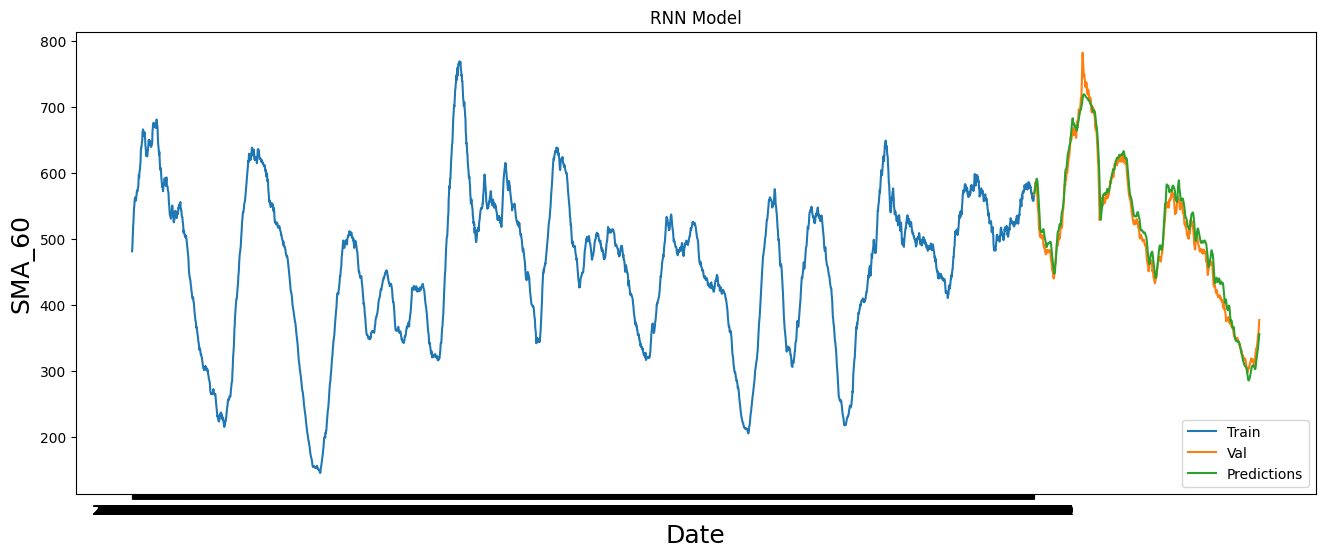

In [64]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data

plt.figure(figsize=(16,6))
plt.title('RNN Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('SMA_60', fontsize=18)
plt.plot(train['date'], train['sma_60'])
plt.plot(valid[['sma_60', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## ARIMA Based Model

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary, differencing needed.")

check_stationarity(df['sma_60'])

ADF Statistic: -6.534603589547074
p-value: 9.678916836964609e-09
The series is stationary.


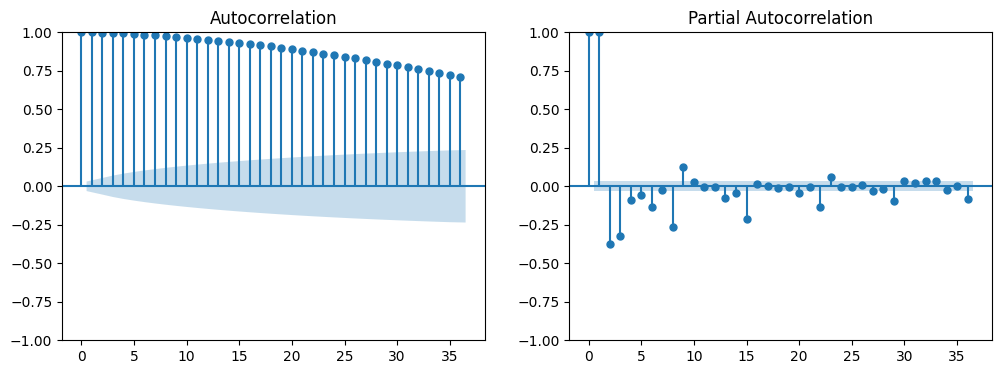

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(df['sma_60'].dropna(), ax=axes[0])  # ACF for MA term
sm.graphics.tsa.plot_pacf(df['sma_60'].dropna(), ax=axes[1])  # PACF for AR term
plt.show()

In [ ]:
train

date     value     sma_7     std_7    sma_14    std_14    sma_30  \
0     2013-12-31  0.599716  0.378678  0.312259  0.509344  0.362878  0.617119   
1     2014-01-01  0.171751  0.370932  0.326999  0.473943  0.375769  0.613279   
2     2014-01-02  0.454194  0.404347  0.340873  0.470689  0.370800  0.629007   
3     2014-01-03  0.627690  0.449784  0.419255  0.478853  0.394660  0.649721   
4     2014-01-04  0.259558  0.448020  0.421563  0.475756  0.397014  0.637218   
...          ...       ...       ...       ...       ...       ...       ...   
3165  2022-10-06  0.234894  0.313092  0.097455  0.322299  0.114269  0.493262   
3166  2022-10-07  0.281637  0.315726  0.097258  0.323978  0.115709  0.485462   
3167  2022-10-08  0.412993  0.335074  0.148969  0.345484  0.158189  0.487208   
3168  2022-10-09  0.306277  0.349592  0.134794  0.362281  0.144204  0.497570   
3169  2022-10-10  0.630400  0.398343  0.310051  0.417795  0.269477  0.520689   

        std_30    sma_60    std_60    sma_90    std_90   sma_180   std_180  \
0     0.412372  0.527103  0.547646  0.367446  0.669326  0.123547  0.558450   
1     0.420899  0.533265  0.531371  0.372444  0.659842  0.120908  0.556412   
2     0.418474  0.552607  0.517271  0.385600  0.665893  0.127801  0.572317   
3     0.452679  0.578789  0.533224  0.405049  0.695642  0.138285  0.613616   
4     0.456072  0.588047  0.512854  0.412753  0.685245  0.138359  0.613706   
...        ...       ...       ...       ...       ...       ...       ...   
3165  0.301691  0.656504  0.464751  0.669189  0.472237  0.677774  0.387126   
3166  0.295797  0.648047  0.457851  0.667501  0.472712  0.681790  0.377977   
3167  0.299315  0.654524  0.459357  0.675799  0.466936  0.683415  0.380393   
3168  0.287027  0.647723  0.453009  0.676626  0.466440  0.682900  0.380311   
3169  0.355050  0.662637  0.486283  0.688588  0.494396  0.689066  0.405191   

       sma_365   std_365  value_pct_change  
0     0.103594  0.458285          0.019665  
1     0.101754  0.458215          0.003366  
2     0.105699  0.467893          0.032033  
3     0.113079  0.496918          0.016727  
4     0.109725  0.488994          0.004916  
...        ...       ...               ...  
3165  0.704885  0.499103          0.011657  
3166  0.705131  0.498965          0.014490  
3167  0.707798  0.500734          0.017747  
3168  0.707833  0.500733          0.008921  
3169  0.717083  0.513936          0.024955  

[3170 rows x 17 columns]

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


# Train-test split
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]


# Auto ARIMA to find best (p,d,q) parameters
auto_arima_model = auto_arima(train['sma_60'], seasonal=False, trace=True)
best_p, best_d, best_q = auto_arima_model.order

# Fit ARIMA model
arima_model = ARIMA(train['sma_60'], order=(best_p, best_d, best_q))
arima_fit = arima_model.fit()

# Forecast using ARIMA
arima_forecast = arima_fit.forecast(steps=len(test))

# Evaluate ARIMA
arima_rmse = np.sqrt(mean_squared_error(test['sma_60'], arima_forecast))
print(f'ARIMA RMSE: {arima_rmse}')

# # Auto SARIMA to find best (p,d,q) & (P,D,Q,s) parameters
# auto_sarima_model = auto_arima(train['sma_60'], seasonal=True, m=30, trace=True)
# best_p, best_d, best_q = auto_sarima_model.order
# best_P, best_D, best_Q, best_s = auto_sarima_model.seasonal_order

# # Fit SARIMA model
# sarima_model = SARIMAX(train['sma_60'], order=(best_p, best_d, best_q),
#                        seasonal_order=(best_P, best_D, best_Q, best_s))
# sarima_fit = sarima_model.fit()

# # Forecast using SARIMA
# sarima_forecast = sarima_fit.forecast(steps=len(test))

# # Evaluate SARIMA
# sarima_rmse = np.sqrt(mean_squared_error(test['sma_60'], sarima_forecast))
# print(f'SARIMA RMSE: {sarima_rmse}')







Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-23524.100, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-22256.252, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-22966.587, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-22646.608, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-22258.141, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-23463.876, Time=0.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-23502.866, Time=0.87 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-23434.722, Time=2.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-23404.590, Time=3.63 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-23487.720, Time=1.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-23577.913, Time=1.97 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-23283.176, Time=2.19 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-23388.285, Time=0.92 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-23093.542, Time=1.61 sec
 ARIM

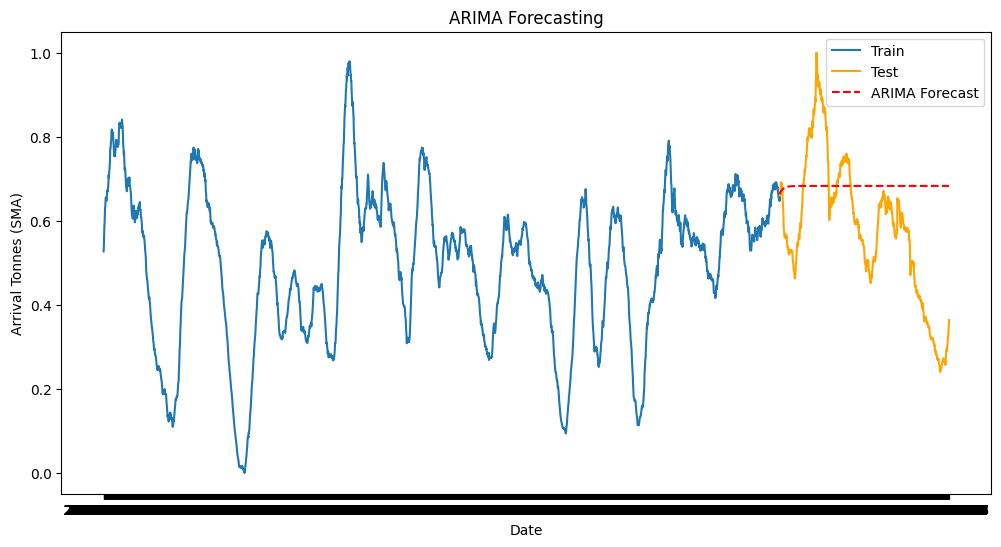

In [ ]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train['date'], train['sma_60'], label='Train')
plt.plot(test['date'], test['sma_60'], label='Test', color='orange')
plt.plot(test['date'], arima_forecast, label='ARIMA Forecast', linestyle='dashed', color='red')
# plt.plot(test['date'], sarima_forecast, label='SARIMA Forecast', linestyle='dashed', color='green')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Arrival Tonnes (SMA)')
plt.title('ARIMA Forecasting')
plt.show()


In [ ]:
arima_rmse = np.sqrt(mean_squared_error(test['sma_60'], arima_forecast))

In [ ]:
r2 = r2_score(test['sma_60'], arima_forecast)
print(f"R² Score: {r2:.4f}")

R² Score: -0.4042
